In [1]:
import scanpy as sc
import scgen
import scIB
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = 8,8

In [4]:
adata = sc.read("/storage/groups/ml01/workspace/group.daniela/mca_tm_liv_kid_pan.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 29786 × 18695 
    obs: 'barcode', 'batch', 'cell_type', 'cell_type_union', 'channel', 'log_counts', 'marker_gene', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'sample_id', 'sex', 'size_factors', 'study', 'tissue', 'louvain'
    var: 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_ids-1-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'neighbors', 'pca', 'study_colors', 'tissue_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

In [6]:
corrected_adata = scIB.integration.runScGen(
    adata, cell_type='cell_type_union', batch='study', epochs=20,
    model_path="../data/models/method")

W0823 19:41:12.445488 140643376179008 deprecation_wrapper.py:119] From /home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scgen/models/_vae.py:35: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0823 19:41:12.447158 140643376179008 deprecation_wrapper.py:119] From /home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scgen/models/_vae.py:42: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 19:41:13.220102 140643376179008 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0823 19:41:13.221404 140643376179

Epoch 0: Train Loss: 338.29961507243496
Epoch 1: Train Loss: 2622.4796334789644
Epoch 2: Train Loss: 51865484.72500289
Epoch 3: Train Loss: 289.8965965927288
Epoch 4: Train Loss: 285.0286012300881
Epoch 5: Train Loss: 281.84406017180413
Epoch 6: Train Loss: 279.7881145969514
Epoch 7: Train Loss: 277.16788892233245
Epoch 8: Train Loss: 274.8854029399092
Epoch 9: Train Loss: 273.7810089111328
Epoch 10: Train Loss: 272.6352357372161
Epoch 11: Train Loss: 272.3764554956908
Epoch 12: Train Loss: 270.2991584285613
Epoch 13: Train Loss: 269.2825463141165
Epoch 14: Train Loss: 268.1520008558868
Epoch 15: Train Loss: 267.317952763137
Epoch 16: Train Loss: 266.68906964332825
Epoch 17: Train Loss: 266.02669839961555
Epoch 18: Train Loss: 265.1545211566392
Epoch 19: Train Loss: 264.43245360056557


Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.
Trying to set attribute `.X` of view, making a copy.


In [7]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

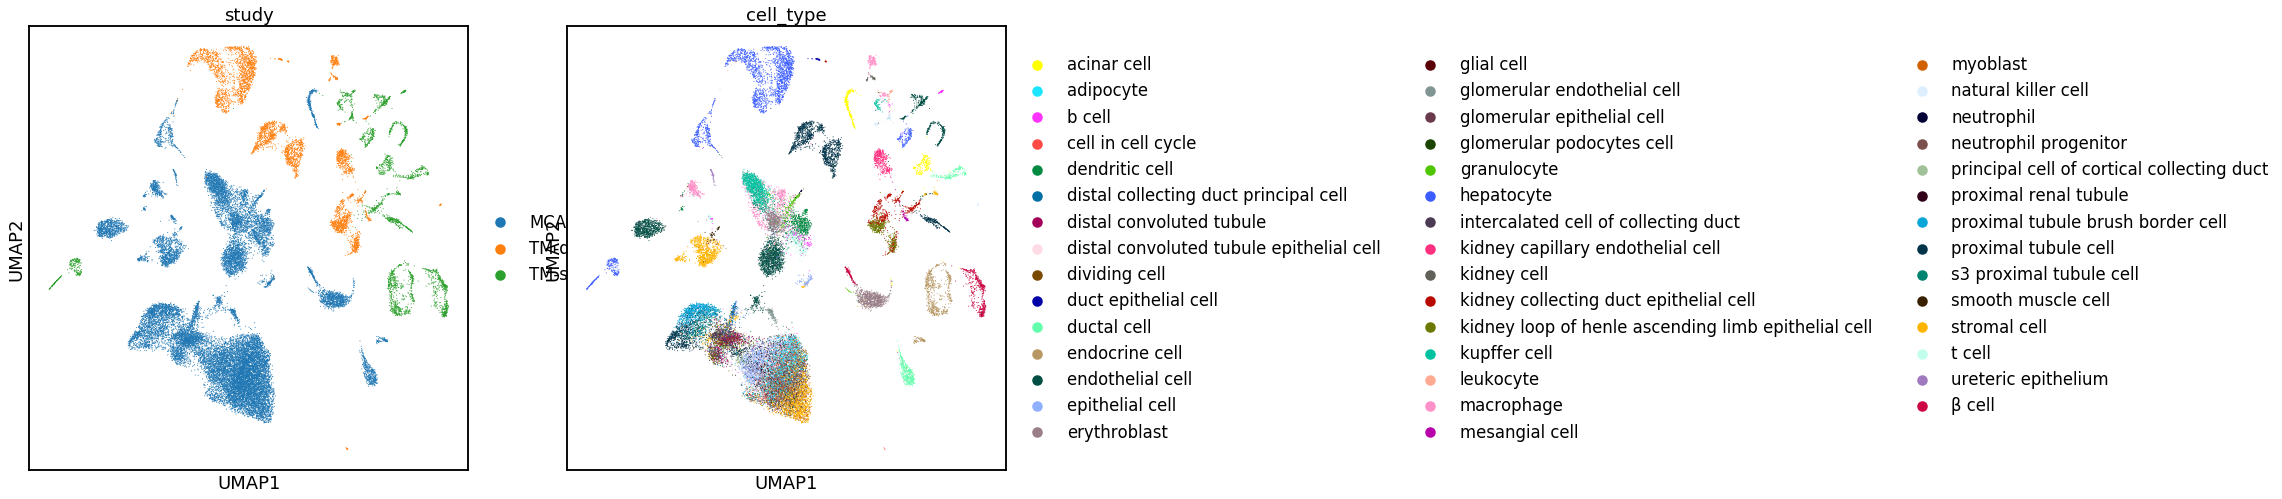

In [8]:
sc.pl.umap(adata, color=['study', 'cell_type'])